<a href="https://colab.research.google.com/github/hacksJuanDavid/StudentPredictionGrade/blob/main/StudentPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Url data
url = 'https://raw.githubusercontent.com/cgiohidalgo/repositoryclass/main/datatest/data_stutent_predict.csv'
# Read data
df = pd.read_csv(url, delimiter=';', skipinitialspace=True)
# Head
df.head()

,Estudiante,Talleres 1_10%,Actividad colaborativa_10%,Parcial1_ 20%,Talleres2_10%,Parcial2_20%,Proyecto_30%,grade,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,1,4.9,5.0,3.5,4.4,1.7,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3.7,5.0,3.7,3.3,1.8,4.2,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,4.9,5.0,4.1,4.7,2.5,5.0,4.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4.8,5.0,3.4,4.3,2.5,4.4,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,4.9,5.0,3.2,4.2,2.5,4.4,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# View columns
df.columns

Index(['Estudiante', 'Talleres 1_10%', 'Actividad colaborativa_10%',
       'Parcial1_ 20%', 'Talleres2_10%', 'Parcial2_20%', 'Proyecto_30%',
       'grade', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')

In [ ]:
# Drop columns not contributin in model
df = df.drop(['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'], axis=1)

In [ ]:
# Verify data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Estudiante                  691 non-null    int64  
 1   Talleres 1_10%              691 non-null    float64
 2   Actividad colaborativa_10%  691 non-null    float64
 3   Parcial1_ 20%               691 non-null    float64
 4   Talleres2_10%               691 non-null    float64
 5   Parcial2_20%                691 non-null    float64
 6   Proyecto_30%                691 non-null    float64
 7   grade                       691 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 43.3 KB


array([[<Axes: title={'center': 'Estudiante'}>,
        <Axes: title={'center': 'Talleres 1_10%'}>,
        <Axes: title={'center': 'Actividad colaborativa_10%'}>],
       [<Axes: title={'center': 'Parcial1_ 20%'}>,
        <Axes: title={'center': 'Talleres2_10%'}>,
        <Axes: title={'center': 'Parcial2_20%'}>],
       [<Axes: title={'center': 'Proyecto_30%'}>,
        <Axes: title={'center': 'grade'}>, <Axes: >]], dtype=object)

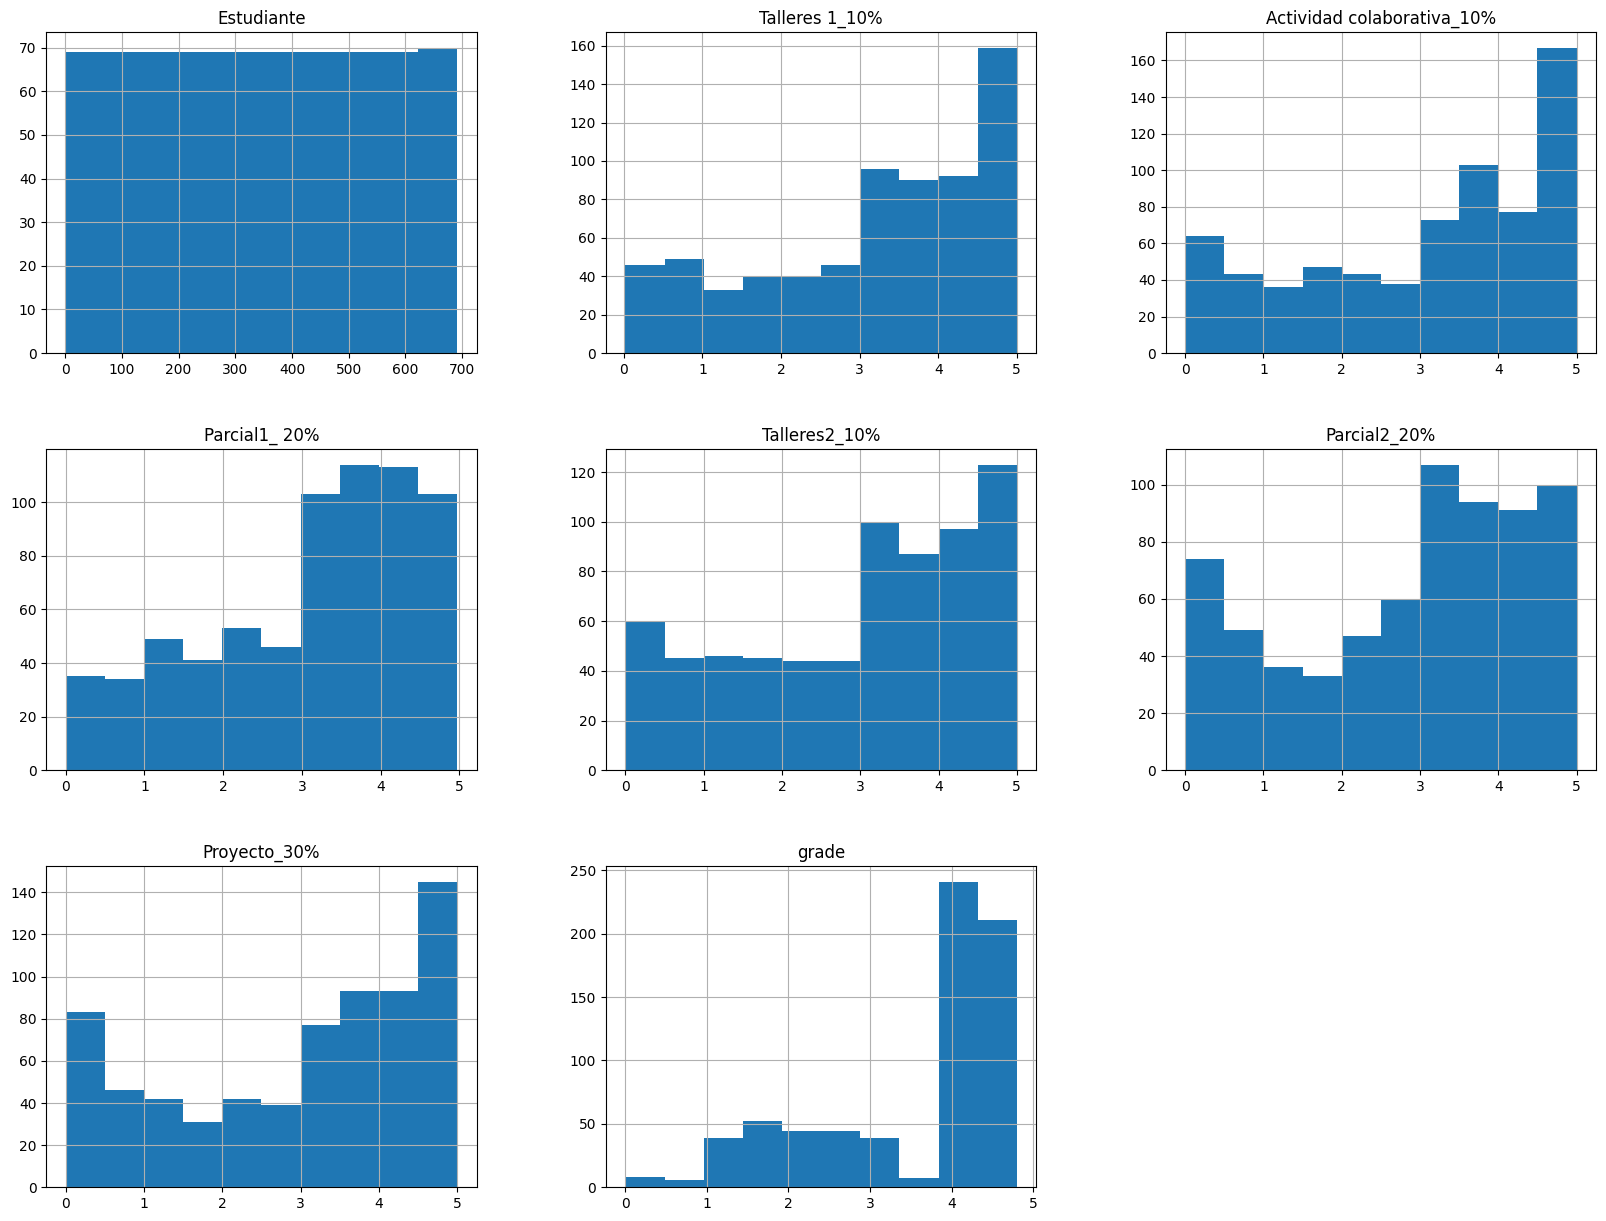

In [ ]:
# Create histogram frecuency for view data moved in set
df.hist(figsize=(20,15))

In [ ]:
# prompt: Calculate grade using data in table Talleres 1_10%	Actividad colaborativa_10%	Parcial1_ 20%	Talleres2_10%	Parcial2_20%	Proyecto_30%

# Function to calculate the final grade
def calculate_grade(row):
  """Calculates the final grade based on the weights provided."""
  grade = (row['Talleres 1_10%'] * 0.10) + \
          (row['Actividad colaborativa_10%'] * 0.10) + \
          (row['Parcial1_ 20%'] * 0.20) + \
          (row['Talleres2_10%'] * 0.10) + \
          (row['Parcial2_20%'] * 0.20) + \
          (row['Proyecto_30%'] * 0.30)
  return grade

# Apply the function to calculate the grade for each row
df['Nota_Final'] = df.apply(calculate_grade, axis=1)

# Print the DataFrame with the calculated final grade view all notes
df

,Estudiante,Talleres 1_10%,Actividad colaborativa_10%,Parcial1_ 20%,Talleres2_10%,Parcial2_20%,Proyecto_30%,grade,Nota_Final
0,1,4.90,5.00,3.50,4.40,1.70,5.00,4.00,3.970
1,2,3.70,5.00,3.70,3.30,1.80,4.20,3.60,3.560
2,3,4.90,5.00,4.10,4.70,2.50,5.00,4.30,4.280
3,4,4.80,5.00,3.40,4.30,2.50,4.40,3.90,3.910
4,5,4.90,5.00,3.20,4.20,2.50,4.40,3.90,3.870
...,...,...,...,...,...,...,...,...,...
686,687,4.43,3.93,4.49,4.32,4.75,4.13,4.10,4.355
687,688,4.87,4.36,4.68,4.01,3.27,3.45,4.68,3.949
688,689,4.82,4.71,4.40,3.17,4.40,4.13,4.29,4.269
689,690,3.74,4.62,4.83,3.27,4.96,3.97,4.42,4.312


In [ ]:
# Select vars
features = [
    'Talleres 1_10%',
    'Actividad colaborativa_10%',
    'Parcial1_ 20%',
    'Talleres2_10%',
    'Parcial2_20%'
]

# Fetures for train
X = df[features]
# Objective
y = df['Nota_Final']

In [ ]:
# Partial data for train model 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Model for prediction using regressor
regr = RandomForestRegressor(
    n_estimators=50,
    max_depth=22,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=0
)
# Fit
regr.fit(X, y)

RandomForestRegressor(max_depth=22, max_features='sqrt', n_estimators=50,
                      random_state=0)

In [ ]:
# Predict on the test data
y_pred = regr.predict(X_test)

# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred) # Use y_test instead of y
mse = mean_squared_error(y_test, y_pred) # Use y_test instead of y
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred, multioutput='variance_weighted')

# Show the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.11
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15
R² Score: 0.98


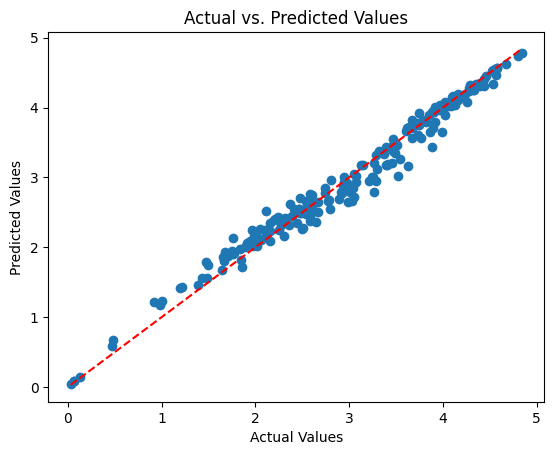

In [ ]:
# Evaluate model using grafic squared
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

In [ ]:
# Example student data
new_student_data = pd.DataFrame({
    'Talleres 1_10%': [5.0],  # Use a list to enclose the scalar value
    'Actividad colaborativa_10%': [4.0],  # Use a list to enclose the scalar value
    'Parcial1_ 20%': [4.5],  # Use a list to enclose the scalar value
    'Talleres2_10%': [4.2],  # Use a list to enclose the scalar value
})

# Predict the grade for the new student
predicted_grade = regr.predict(new_student_data)

print(f"Predicted grade for the new student: {predicted_grade[0]:.2f}")

Predicted grade for the new student: 4.38


In [ ]:
# Example student data for a student who might not graduate
new_student_data_not_graduate = pd.DataFrame({
    'Talleres 1_10%': [2.0],  # Low score
    'Actividad colaborativa_10%': [1.6],  # Low score
    'Parcial1_ 20%': [2.6],  # Low score
    'Talleres2_10%': [1.5],  # Low score
})

# Predict the grade for the new student
predicted_grade_not_graduate = regr.predict(new_student_data_not_graduate)

print(f"Predicted grade for the student who might not graduate: {predicted_grade_not_graduate[0]:.2f}")

Predicted grade for the student who might not graduate: 3.15


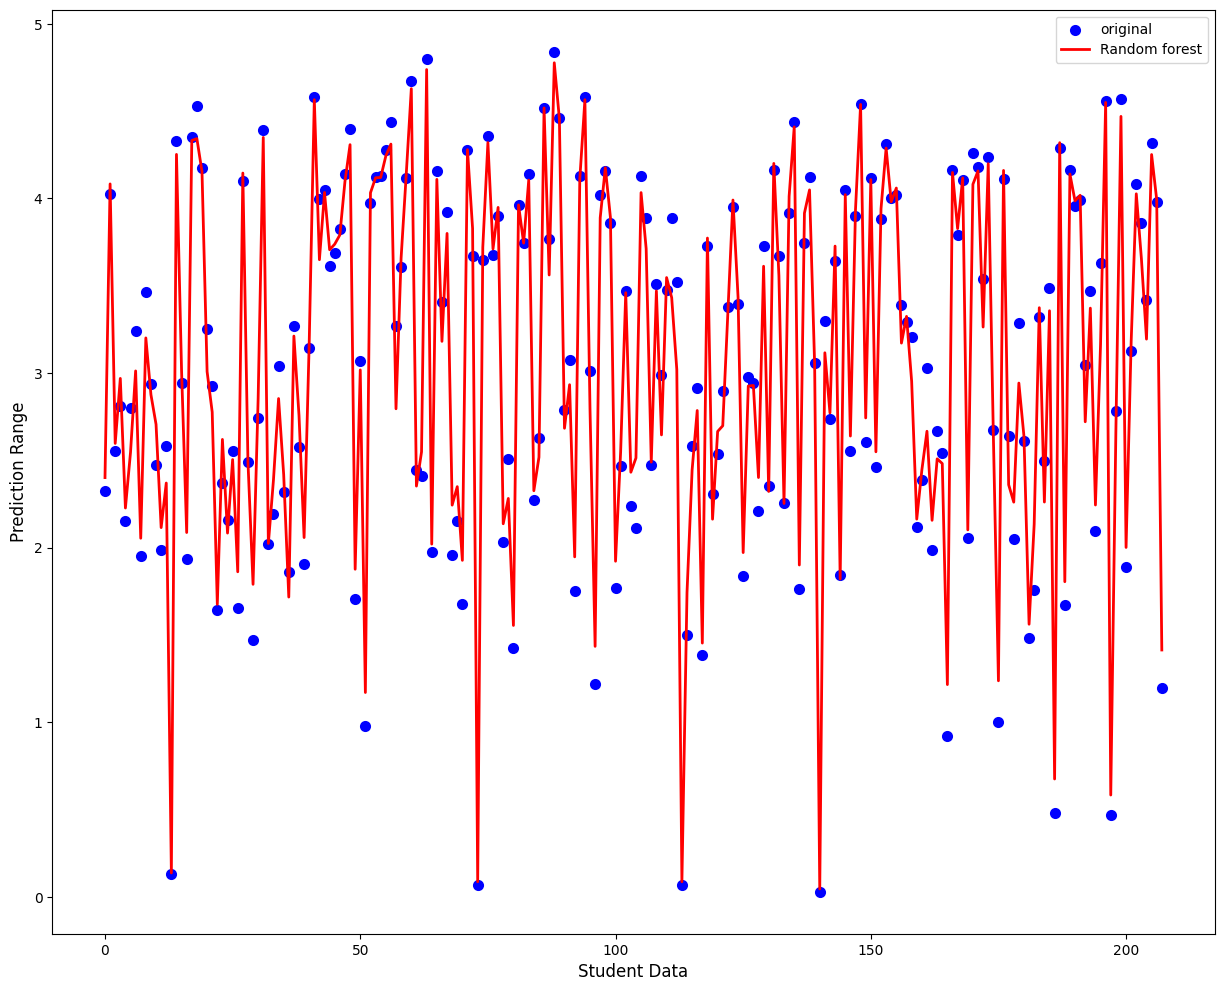

In [ ]:
y = y_test
yhat = y_pred
x = list(range(len(yhat))) # Use the length of yhat instead of y

plt.figure(figsize=((15,12)))

plt.scatter(x, y_test[:len(yhat)], color="blue", label="original", linewidth=2) # Slice y_test to match the length of yhat
plt.plot(x, yhat, color="red", label="Random forest", linewidth=2)

plt.xlabel('Student Data', fontsize=12)
plt.ylabel('Prediction Range', fontsize=12)
plt.legend()
plt.show()

In [ ]:
# prompt: Comprobar el r2 score en validacion del modelo

from sklearn.model_selection import cross_val_score

# Perform cross-validation
# Use X_train and y_train for cross-validation, not the full dataset (X) and test labels (y)
cv_scores = cross_val_score(regr, X_train, y_train, cv=5, scoring='r2')

# Print the cross-validation scores
print("Cross-Validation R² Scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean R² Score:", cv_scores.mean())
print("Standard Deviation of R² Score:", cv_scores.std())

Cross-Validation R² Scores: [0.843112   0.78378431 0.78333716 0.83325685 0.81258027]
Mean R² Score: 0.8112141192986133
Standard Deviation of R² Score: 0.02463632677036876


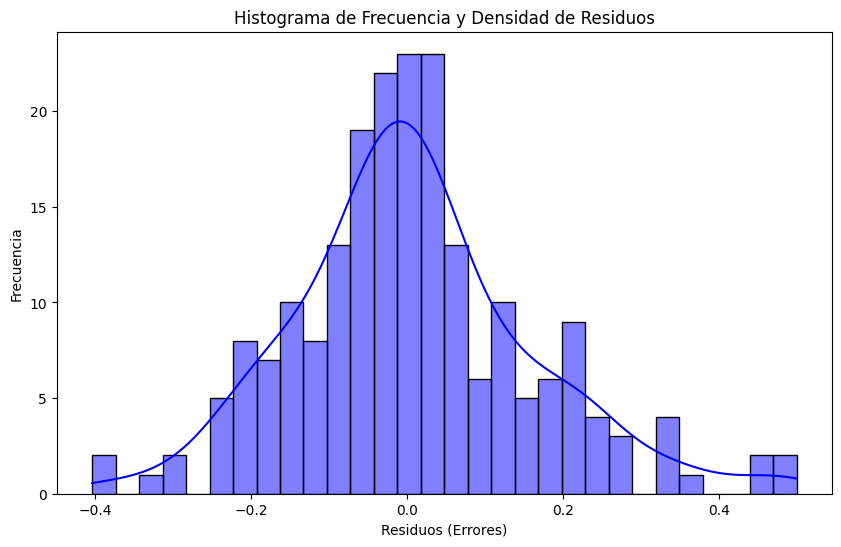

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure both arrays have the same length - use the smaller length
min_len = min(len(y_test), len(y_pred))

# Calculate residuals
residuos = y_test[:min_len] - y_pred[:min_len]

# Crear gráfico de densidad de los residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, bins=30, color='blue')

# Añadir etiquetas y título
plt.xlabel('Residuos (Errores)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frecuencia y Densidad de Residuos')

# Mostrar la gráfica
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import numpy as np

# Crear un conjunto de datos de ejemplo
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=0)

# Definir el modelo
regr = RandomForestRegressor(random_state=0)

# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 14, 18, 22],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Usar RandomizedSearchCV para encontrar la mejor combinación de hiperparámetros
random_search = RandomizedSearchCV(
    estimator=regr,
    param_distributions=param_dist,
    n_iter=50,  # Número de combinaciones a probar
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=0
)

random_search.fit(X, y)

# Obtener los mejores parámetros y el mejor modelo
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Mejores hiperparámetros encontrados:", best_params)

# Evaluar el mejor modelo en el conjunto de datos
y_pred = best_model.predict(X)
mse = mean_squared_error(y, y_pred)
print("MSE del mejor modelo:", mse)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Mejores hiperparámetros encontrados: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 22}
MSE del mejor modelo: 88.528834176121
